<center> <span style="color:indigo">Métodos Estadísticos Básicos</span> </center> 

<img src="imagenes/MCD.jpg" alt="Drawing" style="width: 600px;"/>

<center> <span style="color:DarkBlue">  Estadística Inferencial: Regresión lineal simple y múltiple, Ejercicio con dataset mtcars. </span>  </center>
<center> <span style="color:Blue"> M. en C. Iván A. Toledano Juárez </span>  </center>

## Importación de librerías

In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

from scipy import stats

import itertools

%matplotlib inline

Los datos fueron obtenidos de [Kaggle](https://www.kaggle.com/datasets/lavanya321/mtcars). La variable a inferir es el rendimiento (**mpg**) en millas por galón.

La descripción de los datos es la siguiente:

* **mpg** -	Miles/(US) gallon
* **cyl** -	Number of cylinders
* **disp** -	Displacement (cu.in.)
* **hp** -	Gross horsepower
* **drat** -	Rear axle ratio
* **wt** -	Weight (1000 lbs)
* **qsec** -	1/4 mile time
* **vs** -	Engine (0 = V-shaped, 1 = straight)
* **am** -	Transmission (0 = automatic, 1 = manual)
* **gear** -	Number of forward gears 

## Importación de datos

In [407]:
df_cars = pd.read_csv("Datasets/mtcars.csv")
df_cars.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [408]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [409]:
## matriz de correlación

df_corr = df_cars.corr()
df_corr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


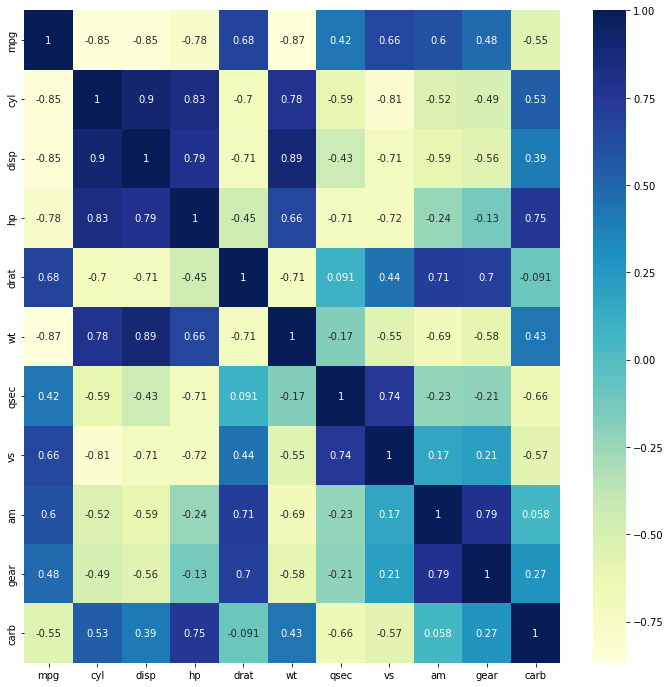

In [410]:
# matriz de correlacion como heatmap

plt.figure(figsize=(12,12))
sns.heatmap(data=df_corr,
            cmap="YlGnBu",
            annot = True)
plt.show()

Con respecto a la variable **mpg**, se observa que la mayor correlación se encuentra con las variables **cyl, disp, hp, drat, wt**. Aún así, se tienen problemas de multicolinealidad entre distintas variables de entrada. 

## Caso especial: variables disp

En este caso el diagrama de dispersión nos muestra una tendencia como una ley de potencias. Podemos intentar hacer una regresión lineal para inferir primero esta potencia.

Cuando tenemos una ley de potencias entre dos variables (x,y), su relación toma la siguiente forma:

\begin{equation}
y = C x^\alpha
\end{equation}

donde $C$ es una constante y \alpha es la potencia. Aplicando la función logaritmo en ambos lados de la ecuación y utilizando sus propiedades, tenemos que:

\begin{equation}
\log(y) = \log(C x^\alpha) = \log(C) + \log(x^\alpha) =\log(C) + \alpha \log(x) 
\end{equation}

Con lo cual, renombrando a las variables $\log(y) \to Y$, $\log(x) \to X$, $\log(C) \to \beta_0$, $\alpha \to \beta_1$, recuperamos la ecuación de la recta con estas nuevas variables,

\begin{equation}
Y = \beta_0 + \beta_1 X
\end{equation}

Entonces, realizamos la regresión lineal sobre estas nuevas variables ya transformadas. Una vez obtenido los parámetros de la regresión $\beta_0$ y $\beta_1$, uno puede regresarse y encontrar los parámetros de la ley de potencias original, con $C \to e^{\beta_0}$ y $\alpha \to \beta_1$, y finalmente tener,

\begin{equation}
y = e^{\beta_0} x^{\beta_1}
\end{equation}

En este caso particular, esta regresión se hace sobre $\log(\rm mpg)$ y $\log(\rm disp)$. Agregamos los logaritmos correspondientes como variables adicionales al dataframe original. Cuidar que el rango de estas variables corresponda al dominio de la función log.

In [411]:
df_cars['ln_disp'] = np.log(df_cars['disp'])
df_cars['ln_mpg'] = np.log(df_cars['mpg'])
df_cars.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,ln_disp,ln_mpg
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,5.075174,3.044522
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,5.075174,3.044522
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,4.682131,3.126761
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,5.552960,3.063391
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,5.886104,2.928524


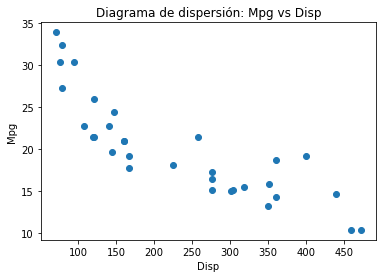

In [412]:
# Gráfica de los datos antes de la transformaciónç

plt.scatter(y=df_cars['mpg'],
            x=df_cars['disp'])
plt.title('Diagrama de dispersión: Mpg vs Disp')
plt.xlabel('Disp')
plt.ylabel('Mpg')
plt.show()

Graficamos el log(mpg) contra log(disp) para observar si ahora sí se observa una tendencia lineal (asociada a una ley de potencias).

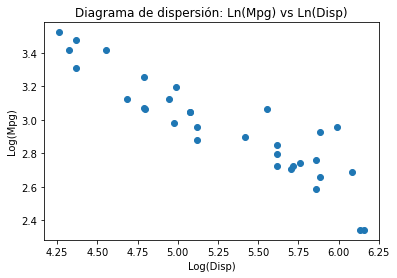

In [413]:
# Gráfica de los datos al aplicarles el logaritmo a ambos.

plt.scatter(y=np.log(df_cars['mpg']),
            x=np.log(df_cars['disp']))
plt.title('Diagrama de dispersión: Ln(Mpg) vs Ln(Disp)')
plt.xlabel('Log(Disp)')
plt.ylabel('Log(Mpg)')
plt.show()

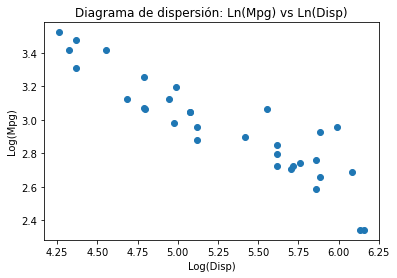

In [414]:
# Gráfica de los datos al aplicarles el logaritmo a ambos. (Diferente sintaxis)

plt.scatter(y=df_cars['ln_mpg'],
            x=df_cars['ln_disp'])
plt.title('Diagrama de dispersión: Ln(Mpg) vs Ln(Disp)')
plt.xlabel('Log(Disp)')
plt.ylabel('Log(Mpg)')
plt.show()

Hacemos el modelo de regresión lineal únicamente para esta variable, para checar su dependencia en ley de potencias.


In [415]:
# Creamos el modelo lineal (lm) con mínimos cuadrados ordinarios
lm = smf.ols(formula = "ln_mpg~ln_disp",
             data = df_cars).fit()
# El método .fit() hace el ajuste a los datos.

In [416]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     137.3
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.01e-12
Time:                        14:46:32   Log-Likelihood:                 21.369
No. Observations:                  32   AIC:                            -38.74
Df Residuals:                      30   BIC:                            -35.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3810      0.208     25.866      0.000       4.956       5.806
ln_disp       -0.4586      0.039    -11.719      0.000      -0.538      -0.379
==============================================================================
Omnibus:                        2.424   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                1.534
Skew:                           0.528   Prob(JB):                        0.464
Kurtosis:                       3.182   Cond. No.                         50.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Graficamos la recta que sale de esta regresión.

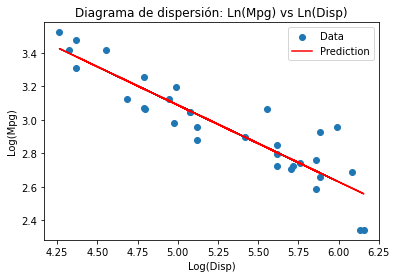

In [417]:
plt.scatter(y=df_cars['ln_mpg'],
            x=df_cars['ln_disp'],
            label='Data')

# Sobreponemos la recta de la regresión
plt.plot(df_cars['ln_disp'],
         lm.params[0] + lm.params[1] * df_cars['ln_disp'],
         color='red',
         label='Prediction')

plt.title('Diagrama de dispersión: Ln(Mpg) vs Ln(Disp)')
plt.xlabel('Log(Disp)')
plt.ylabel('Log(Mpg)')
plt.legend(loc='best')

plt.show()

De los parámetros obtenidos $\beta_0$ y $\beta_1$ de esta regresión lineal podemos obtener la ley de potencias correspondiente,

\begin{equation}
mpg = e^{\beta_0} disp^{\beta_1}
\end{equation}

También podemos graficar la ley de potencias que habíamos planteado junto con los datos originales (sin transformación).

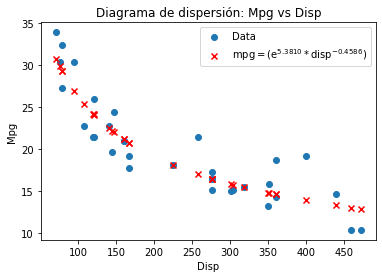

In [418]:
plt.scatter(y=df_cars['mpg'],
            x=df_cars['disp'],
            label='Data')

plt.scatter(df_cars['disp'],
         np.exp(lm.params[0])*df_cars['disp']**(lm.params[1]),
         color='red',
         label=r'$\rm mpg = (e^{5.3810} * disp^{-0.4586})$',
         marker='x')

plt.title('Diagrama de dispersión: Mpg vs Disp')
plt.xlabel('Disp')
plt.ylabel('Mpg')
plt.legend(loc='best')
plt.show()

Los datos se ajustan bastante bien, y vemos que con incluso una sola variable obtenemos un r2 de 0.82, bastante bien. Como hicimos la regresión sobre los las variables ln(mpg) vs ln(dips), el modelo resultante es el siguiente:

\begin{equation}
\rm mpg = e^{5.3810} \times disp^{-0.4586}
\end{equation}

Aunque realmente lo que nos interesa aquí es el exponente -0.4586 que sale de la pendiente de la regresión lineal. Esto nos dice que podríamos ganar precisión a la hora de reconsiderar esta transformación antes de hacer la regresión lineal múltiple.

Podemos crear esta nueva variable en el dataframe original,

In [419]:
df_cars['disp_pow_m0_45'] = df_cars['disp']**(-0.4586)
df_cars.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,ln_disp,ln_mpg,disp_pow_m0_45
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,5.075174,3.044522,0.097542
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,5.075174,3.044522,0.097542
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,4.682131,3.126761,0.116808
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,5.552960,3.063391,0.078349
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,5.886104,2.928524,0.067248


Los graficamos para observar la tendencia considerando esta transformación.

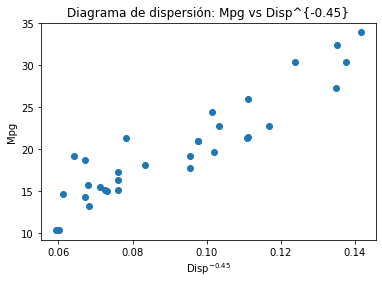

In [420]:
plt.scatter(y=df_cars['mpg'],
            x=df_cars['disp_pow_m0_45'])
plt.title('Diagrama de dispersión: Mpg vs Disp^{-0.45}')
plt.xlabel(r'Disp$^{-0.45}$')
plt.ylabel('Mpg')
plt.show()

Efectivamente, con esta transformación, los elementos de la variable **disp**$^{-0.45}$ ya tienen una dependencia más linear con respecto a **mpg**. Podemos utilizar este resultado para la regresión lineal múltiple.

Queremos utilizar únicamente los valores numéricos para realizar la regresión lineal múltiple. Consideramos modelos con tres variables únicamente.

In [421]:
# Imprimimos las columnas del dataframe
df_cars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb', 'ln_disp', 'ln_mpg', 'disp_pow_m0_45'],
      dtype='object')

In [422]:
# Guardamos dos listas, para variable objetivo y variables de entrada.
Y = ['mpg']
X = ['disp','hp','drat','wt','qsec']

In [423]:
# Creamos una lista con las combinaciones de tres variables
X_comb = list(itertools.combinations(X, 3))
X_comb

[('disp', 'hp', 'drat'),
 ('disp', 'hp', 'wt'),
 ('disp', 'hp', 'qsec'),
 ('disp', 'drat', 'wt'),
 ('disp', 'drat', 'qsec'),
 ('disp', 'wt', 'qsec'),
 ('hp', 'drat', 'wt'),
 ('hp', 'drat', 'qsec'),
 ('hp', 'wt', 'qsec'),
 ('drat', 'wt', 'qsec')]

In [424]:
# Podemos utilizar estas listas para crear un string para la sintaxis del modelo en statsmodels

n_comb = 3 # numero de variables en la combinacion
X_comb = list(itertools.combinations(X, n_comb))

for x in X_comb:
    x_string='' # inicializamos el string para variables de entrada en statsmodels
    for i in range(0,n_comb):
        x_string = x_string + x[i]+'+' # agregamos los strings de las variables
    x_string = x_string.rstrip('+') # removemos el último signo '+'
    print(x_string)


disp+hp+drat
disp+hp+wt
disp+hp+qsec
disp+drat+wt
disp+drat+qsec
disp+wt+qsec
hp+drat+wt
hp+drat+qsec
hp+wt+qsec
drat+wt+qsec


Nos ayudamos de estos strings para meterlo en la sintaxis del modelo de regresión lineal de statsmodels.

In [426]:
# Hacemos un modelo para cada combinación de algunas variables.

n_comb = 3 # numero de variables en la combinacion
X_comb = list(itertools.combinations(X, n_comb))

for x in X_comb:
    
    x_string='' # inicializamos el string para variables de entrada en statsmodels
    for i in range(0,n_comb):
        x_string = x_string + x[i]+'+' # agregamos los strings de las variables
    x_string = x_string.rstrip('+') # removemos el último signo '+'
    
    lm = smf.ols(formula = Y[0] + '~' + x_string, # utilizamos el string generado y lo metemos de entrada al modelo
                 data = df_cars).fit()
    print(lm.summary())
    

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     32.15
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           3.28e-09
Time:                        14:48:08   Log-Likelihood:                -78.510
No. Observations:                  32   AIC:                             165.0
Df Residuals:                      28   BIC:                             170.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3443      6.371      3.036      0.0

Podemos extenderlo para que únicamente nos regresen resultados de la prueba de hipótesis que se realiza sobre cada factor $\beta$. Esta prueba de hipótesis para cada factor tiene la siguiente hipótesis nula y alternativa:

\begin{equation}
H_0: \beta = 0 \\
H_1: \beta \ne 0
\end{equation}

Se realiza una prueba de hipótesis con el estadístico t de la distribución student t (más información en el siguiente [link](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Mostly_Harmless_Statistics_(Webb)/12%3A_Correlation_and_Regression/12.02%3A_Simple_Linear_Regression/12.2.01%3A_Hypothesis_Test_for_Linear_Regression)). Si el p-valor resultante es menor al nivel de significancia (0.05 ó 5% por default), entonces hay evidencia estadística para rechazar la hipótesis nula. En este caso particular, queremos rechazar la hipótesis nula, para mostrar que hay una gran probabilidad de que el factor $\beta \ne 0$ (hipótesis alternativa). Recordar que un factor $\beta$ asociado a una variable no puede ser cero, pues esto significaría que la esta variable y la variable dependiente no tienen correlación.

Juntamos todo lo aprendido y creamos un código que en el cual escribimos las variables de entrada, se genera un cierto numero de combinaciones, y se realizan todos los modelos de éstas. Además, se añade que sólo si todas las variables pasan la prueba de hipótesis es cuando se imprime el summary del modelo.

In [427]:
Y = ['mpg'] # variable dependiente/objetivo
X = ['disp','hp','drat','wt','qsec'] # variables independientes/entrada
#X = ['disp_pow_m0_45','hp','drat','wt','qsec']

# Hacemos un modelo para cada combinación de algunas variables.

n_comb = 3 # numero de variables en la combinacion
X_comb = list(itertools.combinations(X, n_comb))
significance = 0.1

for x in X_comb:
    
    x_string='' # inicializamos el string para variables de entrada en statsmodels
    
    for i in range(0,n_comb):
        x_string = x_string + x[i]+'+' # agregamos los strings de las variables
    x_string = x_string.rstrip('+') # removemos el último signo '+'
    
    lm = smf.ols(formula = Y[0] + '~' + x_string, # utilizamos el string generado y lo metemos de entrada al modelo
                 data = df_cars).fit()
    
    print('##Modelo de regresion lineal para las variables:',x_string,'##')
    
    # Checar p-valores para ver si pasan la prueba de hipótesis
    
    test_count = 0 # número de veces que no se rechaza la hipótesis nula
    for i in range(1,n_comb+1): # nota: los indices de las variables de entrada x_comb y los pvalores no coinciden por 1 unidad
        print(r'p-valor asociado a ',x[i-1],':', round(lm.pvalues[i],5))
        
        # hypothesis testing
        if lm.pvalues[i] < significance:
            print('Se rechaza la hipótesis nula')
        else:
            print('No se rechaza la hipótesis nula')
            test_count += 1
    
    print('Error estándar residual (rmse) = ',round(np.sqrt(lm.mse_resid),3))
    print('')
    if test_count > 0:
        print('Una de las variables no rechaza la hipótesis nula')
    else:
        print('Todas las variables rechazan la hipótesis nula')
        print(lm.summary()) # se imprime el summary solo para los modelos que pasen todas las pruebas de hipótesis
    print('\n')

##Modelo de regresion lineal para las variables: disp+hp+drat ##
p-valor asociado a  disp : 0.0496
Se rechaza la hipótesis nula
p-valor asociado a  hp : 0.02663
Se rechaza la hipótesis nula
p-valor asociado a  drat : 0.07863
Se rechaza la hipótesis nula
Error estándar residual (rmse) =  3.008

Todas las variables rechazan la hipótesis nula
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     32.15
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           3.28e-09
Time:                        14:49:35   Log-Likelihood:                -78.510
No. Observations:                  32   AIC:                             165.0
Df Residuals:                      28   BIC:                             170.9
Df Model:                 

## Pruebas de normalidad

Primero se tiene que añadir una columna con la predicción del modelo elegido. Aquí uno especifica las variables uno de los modelos que quiere probar, y se imprimen sus pruebas de normalidad con QQplot, y pruebas de ShapiroWilk y KolmogorovSmirnov.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           9.38e-10
Time:                        14:51:33   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.0

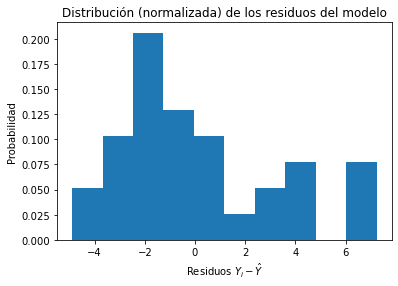

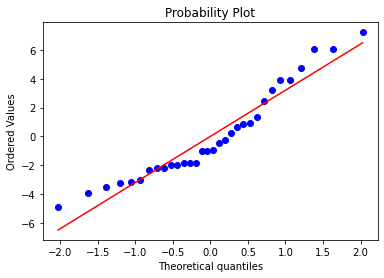

Prueba de Shapiro-Wilk
estadístico W=0.927, p-valor=0.033
Probablemente no es gaussiano


Prueba de Kolmogorov-Smirnov
estadístico K=0.157, p-valor=0.368
Probablemente es gaussiano


In [428]:
Y = ['mpg'] # variable dependiente/objetivo
X = ['disp'] # combinacion de variables independientes
#X = ['disp','hp','drat']
#X = ['disp_pow_m0_45']
#X = ['am','wt','hp','disp','cyl'] 
n_var = len(X) # numero de variables
significance = 0.05


    
x_string='' # inicializamos el string para variables de entrada en statsmodels
    
for i in range(0,n_var):
    x_string = x_string + X[i]+'+' # agregamos los strings de las variables
x_string = x_string.rstrip('+') # removemos el último signo '+'
    
lm = smf.ols(formula = Y[0] + '~' + x_string, # utilizamos el string generado y lo metemos de entrada al modelo
                 data = df_cars).fit()
    
print(lm.summary(),'\n')
print('Error estándar residual (rmse) = ',round(np.sqrt(lm.mse_resid),3))

ypred = lm.predict(df_cars[X]) # se hacen predicciones con los valores X originales
df_cars['pred'] = ypred # se crea una nueva columna con estas predicciones
df_cars['res'] = df_cars['mpg'] - df_cars['pred'] # se crea una nueva columna con los residuos

# Se crea un histograma para ver la distribución de los residuos
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df_cars['res'], density=True)
ax.set_title('Distribución (normalizada) de los residuos del modelo')
ax.set_ylabel('Probabilidad')
ax.set_xlabel(r'Residuos $Y_i - \hat{Y}$')
plt.show()

# Se crea un grafico Q-Q para ver si los residuos siguen una distribución normal
## Q Q plot
stats.probplot(df_cars['res'],
               dist='norm',
               plot=plt)
plt.show()

# Se realiza prueba de hipótesis de Shapiro-Wilk
df_cars['res_std'] = stats.zscore(df_cars['res'])

stat, p = stats.shapiro(df_cars['res_std'])

print('Prueba de Shapiro-Wilk')
print('estadístico W=%.3f, p-valor=%.3f' % (stat,p))

if p > significance:
    print('Probablemente es gaussiano')
else:
    print('Probablemente no es gaussiano')

print('\n')

# Se realiza prueba de hipótesis de Kolmogorov-Smirnov
# Estandarizamos los residuos bajo una distribución normal
df_cars['res_std'] = stats.zscore(df_cars['res'])

stat, p = stats.kstest(df_cars['res_std'],
                       cdf='norm') # prueba de hipótesis K
print('Prueba de Kolmogorov-Smirnov')
print('estadístico K=%.3f, p-valor=%.3f' % (stat,p))

if p > significance:
    print('Probablemente es gaussiano')
else:
    print('Probablemente no es gaussiano')